<a href="https://colab.research.google.com/github/stepanjaburek/workingpaper_czech_psp_speeches/blob/main/Word2Vec_FastText_IPS_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word embeddings

# Setup

In [ ]:
!pip install numpy==1.24.4 --quiet # somehow new numpy doesnt work well with gensim
!pip install gensim==4.3.3 --quiet

import os
os.kill(os.getpid(), 9)

In [1]:
!pip install stanza --quiet
import stanza
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models import FastText
from gensim.models import KeyedVectors
from tqdm import tqdm
tqdm.pandas()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 38.0 MB/s eta 0:00:00


In [9]:
#df = pd.read_csv('/content/word2vec_left.csv')
df = pd.read_csv('/content/word2vec_right.csv')

# Setup lemma

In [3]:
stanza.download("cs")  # get the Czech model
nlp = stanza.Pipeline("cs", processors="tokenize,lemma")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: cs (Czech) ...


INFO:stanza:Downloaded file to /root/stanza_resources/cs/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: cs (Czech):
| Processor | Package      |
----------------------------
| tokenize  | pdt          |
| mwt       | pdt          |
| lemma     | pdt_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [10]:
doc = nlp("levicový poslanec zvolil levicovou vládu a levicová maláčová..babiš babiše babišem") # test lemma setup
lemmas = [word.lemma for sent in doc.sentences for word in sent.words]
print(lemmas)

['levicový', 'poslanec', 'zvolit', 'levicový', 'vláda', 'a', 'levicový', 'maláčová', '.', '.', 'babiš', 'babiše', 'babiš']


In [11]:
# Define the lemmatization function
def lemmatize_text(text):
    text = str(text)
    doc = nlp(text)  # apply Stanza NLP
    lemmas = [word.lemma for sent in doc.sentences for word in sent.words if word.upos != 'PUNCT']     # Get lemmatized tokens (exclude punctuation and spaces)
    return " ".join(lemmas)     # Return the lemmatized text as a string
# Claude helping here

In [13]:
df['text'] = df['text'].fillna('').astype(str) # be sure with NAs, shouldnt be any though
df['text_lemma'] = df['text'].progress_apply(lemmatize_text) # lemmatization using stanza

print(df[['text_lemma', 'text']].head()) # check it

100%|██████████| 83064/83064 [1:26:27<00:00, 16.01it/s]

                                          text_lemma  \
0  vážený paní poslankyně vážený pán poslanec dám...   
1                                      mimo mikrofon   
2                                      mimo mikrofon   
3                                      mimo mikrofon   
4  hovořit z místo omlouvat se omyl být nahlásil ...   

                                                text  
0  vážené paní poslankyně  vážení páni poslanci  ...  
1                                  mimo mikrofon      
2                                  mimo mikrofon      
3                                  mimo mikrofon      
4  hovořil z místa   omlouvám se  omylem jsem nah...  


# Or Import already lemmatizated data instead

In [14]:
#df.to_csv('lemmatized_data_left.csv', index=False)
df.to_csv('lemmatized_data_right.csv', index=False)

# FastText

In [61]:
texts = df['text_lemma']
corpus = texts.progress_apply(lambda x: simple_preprocess(x, deacc=False)) # finalize using gensim's simple_preprocess
print(corpus.head())

100%|██████████| 83064/83064 [00:21<00:00, 3832.00it/s]

0    [vážený, paní, poslankyně, vážený, pán, poslan...
1                                     [mimo, mikrofon]
2                                     [mimo, mikrofon]
3                                     [mimo, mikrofon]
4    [hovořit, místo, omlouvat, se, omyl, být, nahl...
Name: text_lemma, dtype: object


In [63]:
# Train FastText model
model = FastText(
    sentences=corpus,
    vector_size=200,    # dimensions of embedding space (you can adjust this)
    window=7,           # context window size
    min_count=10,       # ignore words with less than this frequency
    workers=8,          # use multiple cores
    sg=1,               # 1 = skip-gram; 0 = CBOW (skip-gram is usually better for infrequent words)
    epochs=10           # number of training passes
)

In [ ]:
# get the already saved word embeddings
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("fasttext_wordvectors_right", mmap='r')
vector = wv['prezident']  # Get numpy vector of a word
wv.most_similar('prezident', topn=20)

In [65]:
model.wv.most_similar('levicový', topn=20)

[('pravicový', 0.8849537968635559),
 ('levicovým', 0.8717182278633118),
 ('levicově', 0.8712047934532166),
 ('pravicově', 0.7574436664581299),
 ('levice', 0.7239279747009277),
 ('pravice', 0.6695894598960876),
 ('opozice', 0.5874530076980591),
 ('vládnout', 0.5739977359771729),
 ('nevládne', 0.5673942565917969),
 ('koalice', 0.5663481950759888),
 ('pětikoalice', 0.5549941658973694),
 ('panický', 0.544329822063446),
 ('nedemokratický', 0.5415959358215332),
 ('liberál', 0.5399074554443359),
 ('unionista', 0.5386995673179626),
 ('demokracie', 0.5378758311271667),
 ('liberální', 0.537123441696167),
 ('převládnout', 0.5370638370513916),
 ('opoziční', 0.5360844135284424),
 ('nalevo', 0.5359100103378296)]

In [66]:
# Get similarity between two words
model.wv.similarity('senát', 'záchod')

0.12640382

In [70]:
# Find odd word out
model.wv.doesnt_match(['ministr', 'prezident', 'Praha', 'premiér'])

'Praha'

In [ ]:
# Word analogies (a is to b as c is to ?)
model.wv.most_similar(positive=['levice', 'obchod'], negative=['pravice'], topn=5)
# nefunguje moc, nebo to neumim

# T SNE downprojection

In [ ]:
!pip install adjustText

<ipython-input-75-0d73074b10df>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, len(words))


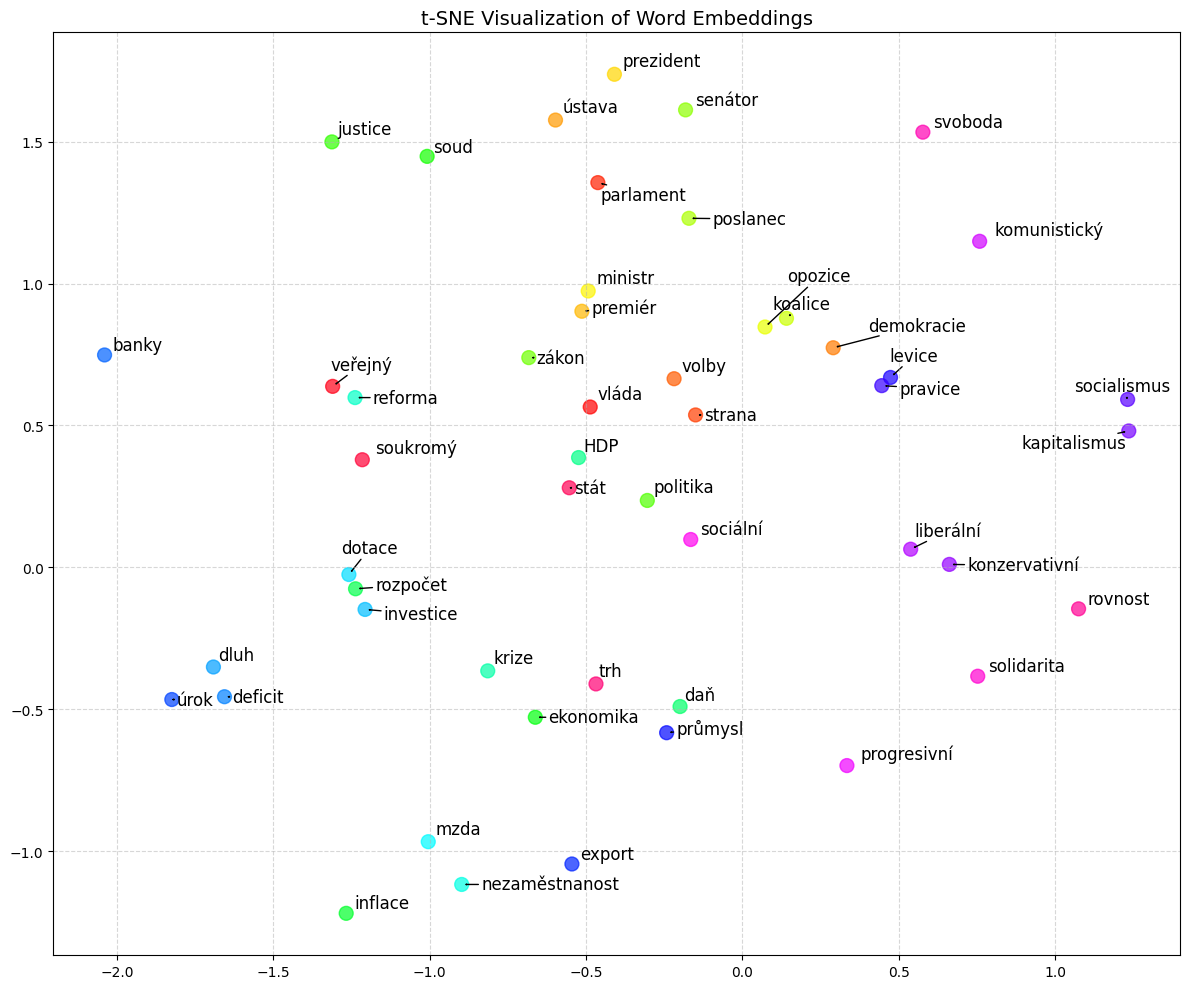

<ipython-input-75-0d73074b10df>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, len(words))


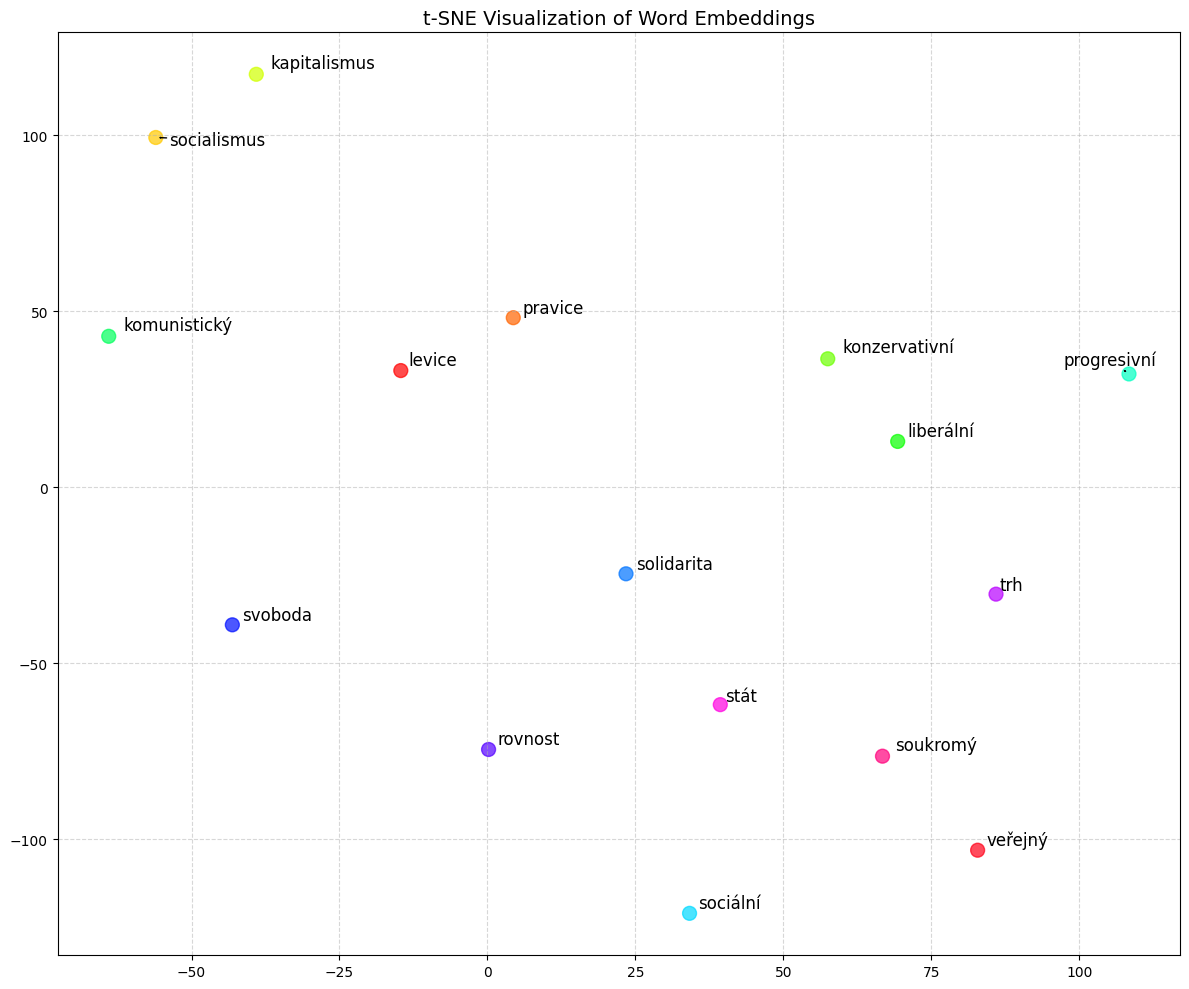

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from adjustText import adjust_text

def plot_tsne(model, words, perplexity=35, figsize=(12, 10), colormap='hsv', adjust=True):
    """
    Create a t-SNE plot for the given words using their embeddings.

    Parameters:
    - model: FastText model
    - words: list of words to visualize
    - perplexity: t-SNE perplexity parameter
    - figsize: figure size
    - colormap: matplotlib colormap for points
    - adjust: whether to use adjust_text to prevent label overlap
    """
    # Get word vectors
    word_vectors = np.array([model.wv[word] for word in words])

    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    coordinates = tsne.fit_transform(word_vectors)

    # Create a scatter plot
    plt.figure(figsize=figsize)

    # Use different colors for points
    colors = cm.get_cmap(colormap, len(words))

    x = coordinates[:, 0]
    y = coordinates[:, 1]

    plt.scatter(x, y, c=range(len(words)), cmap=colors, alpha=0.7, s=100)

    # Add labels for each point
    texts = []
    for i, word in enumerate(words):
        texts.append(plt.text(x[i], y[i], word, fontsize=12))

    if adjust:
        # Adjust text positions to prevent overlap
        adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

    plt.title('t-SNE Visualization of Word Embeddings', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('word_embeddings_tsne.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage:
# 1. Political terms
political_terms = ['vláda', 'parlament', 'strana', 'volby', 'demokracie', 'ústava',
                  'premiér', 'prezident', 'ministr', 'opozice', 'koalice', 'poslanec',
                  'senátor', 'zákon', 'politika', 'justice', 'soud', 'ekonomika', 'inflace', 'rozpočet', 'daň', 'HDP', 'krize',
                 'reforma', 'nezaměstnanost', 'mzda', 'dotace', 'investice', 'dluh',
                 'deficit', 'banky', 'úrok', 'export', 'průmysl','levice', 'pravice', 'socialismus', 'kapitalismus', 'konzervativní',
                     'liberální', 'komunistický', 'progresivní', 'sociální', 'solidarita',
                     'svoboda', 'rovnost', 'trh', 'stát', 'soukromý', 'veřejný']

# Run the visualization
plot_tsne(model, political_terms)
# Compare left/right political terms
political_spectrum = ['levice', 'pravice', 'socialismus', 'kapitalismus', 'konzervativní',
                     'liberální', 'komunistický', 'progresivní', 'sociální', 'solidarita',
                     'svoboda', 'rovnost', 'trh', 'stát', 'soukromý', 'veřejný']
plot_tsne(model, political_spectrum, perplexity=5)  # Lower perplexity for smaller set

# Position in space between two vectors

In [72]:
def get_left_right_position(model, left_terms, right_terms, target_word):
    """Get position of a word on left-right axis"""
    # Average left and right seed vectors
    left_vec = np.mean([model.wv[w] for w in left_terms if w in model.wv], axis=0)
    right_vec = np.mean([model.wv[w] for w in right_terms if w in model.wv], axis=0)

    # Create left-right axis
    lr_axis = right_vec - left_vec
    lr_axis = lr_axis / np.linalg.norm(lr_axis)  # Normalize

    # Project target word onto this axis
    if target_word in model.wv:
        position = np.dot(model.wv[target_word], lr_axis)
        return position
    else:
        return None
# Define seed words
left_terms = ['levice', "levicový", "levicová"]
right_terms = ['pravice', "pravicový", "pravicová"]

# Get position of "inflace" (inflation)
position = get_left_right_position(model, left_terms, right_terms, 'svoboda')
print(f"Position of 'inflace' on left-right axis: {position}")
# Positive means right-leaning, negative means left-leaning

Position of 'inflace' on left-right axis: -0.11505492776632309


In [ ]:
word_vectors = model.wv
word_vectors.save("fasttext_wordvectors_right") # Store just the words + their trained embeddings.

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("fasttext_wordvectors_right", mmap='r')
vector = wv['prezident']  # Get numpy vector of a word
wv.most_similar('prezident', topn=20)